In [104]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
# df = pd.read_csv('data/2020 Line 280 AVL report.csv')
df = pd.read_csv('data/2019 Line 280 AVL.csv')
df['Actual Depart Hour'] = df['Actual Depart'].str.split(':',expand=True)[0]

bus_actual_runtime = df.groupby(['Bus Stop ID','Actual Depart Hour'])['Actual Run Time'].mean().reset_index()
bus_dwell_time = df.groupby(['Bus Stop ID','Actual Depart Hour'])['Dwell Time'].mean().reset_index()
df['Difference (Minutes)'] = df['Difference (Minutes)'].abs()
scheduled_departure_offset = df.groupby(['Bus Stop ID','Actual Depart Hour'])['Difference (Minutes)'].mean().reset_index()


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

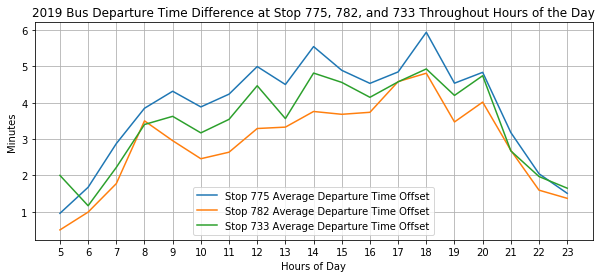

In [105]:
stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 775]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Throughout Hours of the Day", xlabel="Hours of Day", ylabel="Minutes")
# plt.ylim(0,15)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Difference (Minutes)'][1:], label = 'Stop 775 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 782]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Difference (Minutes)'][1:], label = 'Stop 782 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 733]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Difference (Minutes)'][1:], label = 'Stop 733 Average Departure Time Offset')

locs, labels = plt.xticks() 

plt.grid()
plt.legend()
plt.show()


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

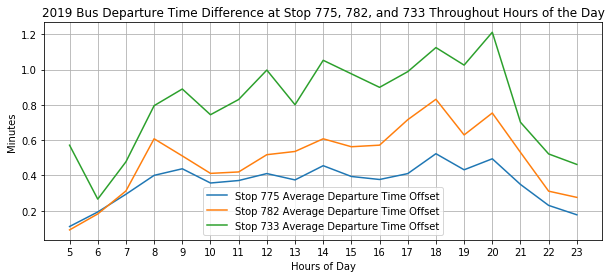

In [106]:

scheduled_departure_offset['Actual Run Time'] = bus_actual_runtime['Actual Run Time']
scheduled_departure_offset['Normalized Offset'] = scheduled_departure_offset['Difference (Minutes)']/scheduled_departure_offset['Actual Run Time']
stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 775]

stopactual['Actual Run Time'] = bus_actual_runtime['Actual Run Time']
stopactual['Normalized Offset'] = stopactual['Difference (Minutes)']/stopactual['Actual Run Time']

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Throughout Hours of the Day", xlabel="Hours of Day", ylabel="Minutes")
# plt.ylim(0,15)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Normalized Offset'][1:], label = 'Stop 775 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 782]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Normalized Offset'][1:], label = 'Stop 782 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 733]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'][1:], stopactual['Normalized Offset'][1:], label = 'Stop 733 Average Departure Time Offset')

locs, labels = plt.xticks() 

plt.grid()
plt.legend()
plt.show()


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


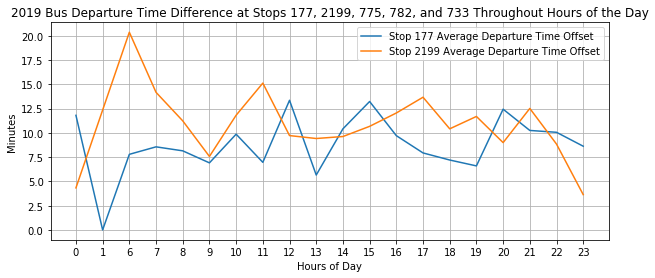

In [107]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Dwell Times at Stops 177 and 2199 Throughout Hours of the Day", xlabel="Hours of Day", ylabel="Minutes")



stopactual = bus_dwell_time.loc[bus_dwell_time['Bus Stop ID'] == 177]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

# plt.ylim(0,15)
plt.plot(stopactual['Actual Depart Hour'], stopactual['Dwell Time'], label = 'Stop 177 Average Dwell Time')


stopactual = bus_dwell_time.loc[bus_dwell_time['Bus Stop ID'] == 2199]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'], stopactual['Dwell Time'], label = 'Stop 2199 Average Dwell Time')



locs, labels = plt.xticks() 

plt.grid()
plt.legend()
plt.show()

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

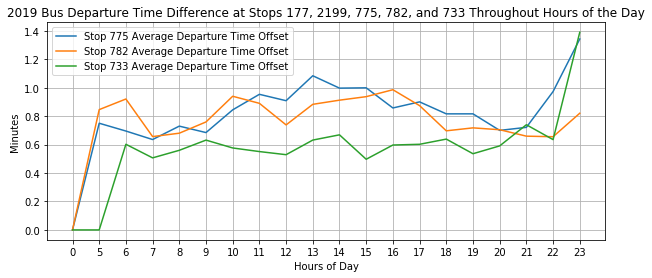

In [108]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Dwell Times at Stops 775, 782, and 733 Throughout Hours of the Day", xlabel="Hours of Day", ylabel="Minutes")


stopactual = bus_dwell_time.loc[bus_dwell_time['Bus Stop ID'] == 775]
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)


plt.plot(stopactual['Actual Depart Hour'], stopactual['Dwell Time'], label = 'Stop 775 Average Dwell Time')

stopactual = bus_dwell_time.loc[bus_dwell_time['Bus Stop ID'] == 782]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'], stopactual['Dwell Time'], label = 'Stop 782 Average Dwell Time')

stopactual = bus_dwell_time.loc[bus_dwell_time['Bus Stop ID'] == 733]

stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(int)
stopactual = stopactual.sort_values(by=['Actual Depart Hour'])
stopactual['Actual Depart Hour'] = stopactual['Actual Depart Hour'].astype(str)

plt.plot(stopactual['Actual Depart Hour'], stopactual['Dwell Time'], label = 'Stop 733 Average Dwell Time')


locs, labels = plt.xticks() 

plt.grid()
plt.legend()
plt.show()